In [232]:
import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
baseball = pandas.read_csv('baseball_data.csv')
baseball.head()

,name,handedness,height,weight,avg,HR
0,Tom Brown,R,73,170,0.000,0
1,Denny Lemaster,R,73,182,0.130,4
2,Joe Nolan,L,71,175,0.263,27
3,Denny Doyle,L,69,175,0.250,16
4,Jose Cardenal,R,70,150,0.275,138


In [233]:
inds = pandas.isnull(baseball).any(1).nonzero()[0]
inds


array([], dtype=int64)

In [234]:
# Preprocessing data to map handedness to numerical values
baseball['handedness'] = baseball['handedness'].map({
        'R': 1,
        'L': 2,
        'B': 3
    })

In [235]:
baseball.describe()

,handedness,height,weight,avg,HR
count,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000
mean,1.452895,72.756266,184.513397,0.186793,45.359551
std,0.654161,2.142272,15.445995,0.106175,74.065110
min,1.000000,65.000000,140.000000,0.000000,0.000000
25%,1.000000,71.000000,175.000000,0.138000,1.000000
50%,1.000000,73.000000,185.000000,0.238000,15.000000
75%,2.000000,74.000000,195.000000,0.258000,55.000000
max,3.000000,80.000000,245.000000,0.328000,563.000000


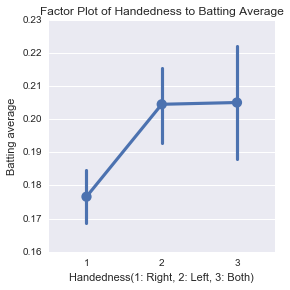

In [236]:
ax = sns.factorplot(x = "handedness", y = 'avg', data=baseball);
sns.plt.title('Factor Plot of Handedness to Batting Average')
ax.set(xlabel='Handedness(1: Right, 2: Left, 3: Both)', ylabel='Batting average')
plt.show()

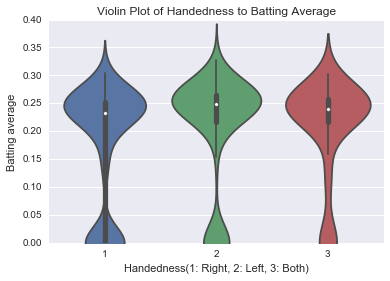

In [237]:
ax = sns.violinplot(x = "handedness", y = 'avg', data=baseball)
ax.set_ylim(0, 0.4)
sns.plt.title('Violin Plot of Handedness to Batting Average')
ax.set(xlabel='Handedness(1: Right, 2: Left, 3: Both)', ylabel='Batting average')
plt.show()

In [238]:
# get the value counts for height and weight
baseball['weight'].value_counts()

180    134
185    122
190    120
175    118
195     99
170     94
200     64
165     57
160     50
205     48
210     33
215     23
155     15
150     12
220     12
187     11
178     10
193      9
182      8
188      8
192      8
197      7
183      7
173      5
176      4
186      4
189      4
230      4
196      4
198      4
      ... 
172      3
209      3
203      3
162      3
225      3
168      3
167      2
174      2
204      2
177      2
235      2
157      2
208      2
154      2
148      1
163      1
161      1
159      1
245      1
179      1
184      1
191      1
194      1
201      1
217      1
218      1
222      1
223      1
228      1
140      1
Name: weight, dtype: int64

In [239]:
# get the value counts for height and weight
baseball['height'].value_counts()

72    232
73    194
74    180
71    145
75    121
70    112
76     66
69     41
77     30
78     11
68     11
80      4
67      4
79      3
66      2
65      1
Name: height, dtype: int64

[<matplotlib.text.Text at 0x11c210550>, <matplotlib.text.Text at 0x11df16150>]

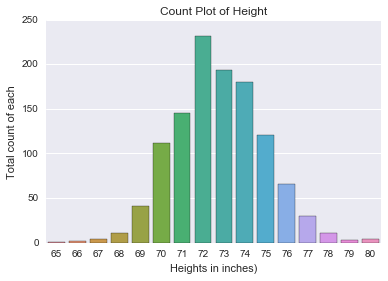

In [240]:
# Checking the distribution of heights
ax = sns.countplot(x="height", data=baseball)
sns.plt.title('Count Plot of Height')
ax.set(xlabel='Heights in inches)', ylabel='Total count of each')

[<matplotlib.text.Text at 0x11b912f50>, <matplotlib.text.Text at 0x11b942c90>]

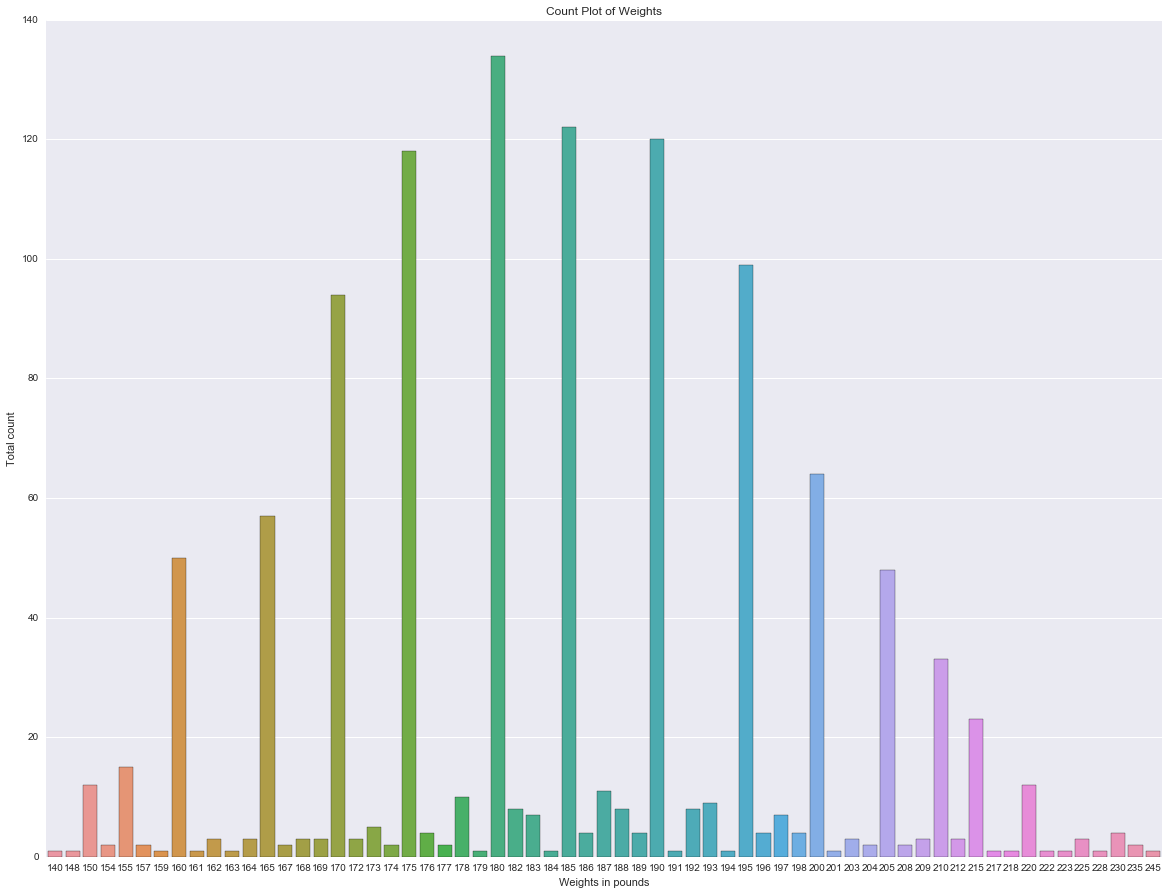

In [241]:
# Checking the distribution of weights
dimensions = (20, 15)
fig, ax = plt.subplots(figsize = dimensions)
ax = sns.countplot(x="weight", data=baseball)
sns.plt.title('Count Plot of Weights')
ax.set(xlabel='Weights in pounds', ylabel='Total count')

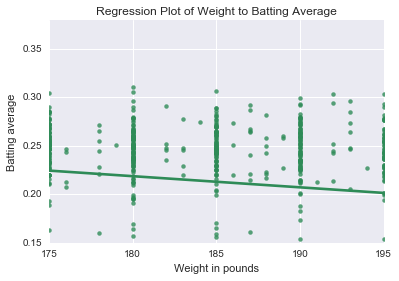

In [242]:
# Checking the regression slope to see correlation between weight and batting average
ax = sns.regplot("weight", "avg", data=baseball, robust=True, ci=None, color="seagreen")
ax.set_xlim(175, 195)
ax.set_ylim(0.15, 0.38)
sns.plt.title('Regression Plot of Weight to Batting Average')
ax.set(xlabel='Weight in pounds', ylabel='Batting average')
sns.despine();

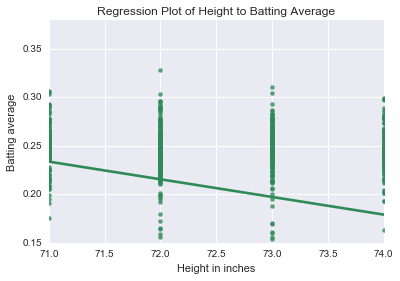

In [243]:
# Checking the regression slope to see correlation between weight and batting average
ax = sns.regplot("height", "avg", data=baseball, robust=True, ci=None, color="seagreen")
ax.set_xlim(71, 74)
ax.set_ylim(0.15, 0.38)
sns.plt.title('Regression Plot of Height to Batting Average')
ax.set(xlabel='Height in inches', ylabel='Batting average')
sns.despine();

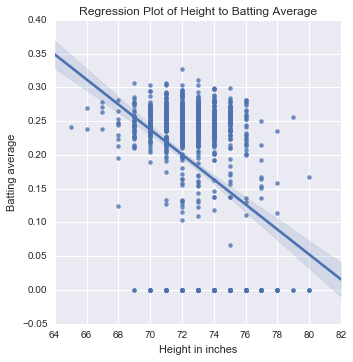

In [244]:
ax = sns.lmplot("height", "avg", data=baseball)
sns.plt.title('Regression Plot of Height to Batting Average')
ax.set(xlabel='Height in inches', ylabel='Batting average')
sns.despine();

In [245]:
# Add percentile based on HR column to data frame
def col_update(row):
    val = 0
    if row['HR'] >= 0 and row['HR'] <= 1:
        val = 'I Quadrant(0-25%)'
    elif row['HR'] > 1 and row['HR'] <= 15:
        val = 'II Quadrant(25-50%)'
    elif row['HR'] > 15 and row['HR'] <= 55:
        val = 'III Quadrant(50-75%)'
    elif row['HR'] > 55:
        val = 'IV Quadrant(75-100%)'
    return val

# Add batting performance column to data frame
def col_update2(row):
    val = 0
    if row['avg'] >= 0.186793:
        val = 'Above Average'
    elif row['avg'] < 0.186793:
        val = 'Below Average'
    return val

In [194]:
# Add percentile based on batting average column to data frame
# def col_update(row):
#     val = 0
#     if row['avg'] >= 0 and row['avg'] <= 0.138:
#         val = 1
#     elif row['avg'] > 0.138 and row['avg'] <= 0.238:
#         val = 2
#     elif row['avg'] > 0.238 and row['avg'] <= 0.258:
#         val = 3
#     elif row['avg'] > 0.258:
#         val = 4
#     return val

# Add batting performance column to data frame
# def col_update2(row):
#     val = 0
#     if row['HR'] >= 15:
#         val = 'Above Average'
#     elif row['HR'] < 15:
#         val = 'Below Average'
#     return val

In [246]:
# Add percentile and batting performance columns to dataframe
baseball['percentile'] = baseball.apply(col_update, axis=1)
baseball['batting_performance'] = baseball.apply(col_update2, axis=1)

In [247]:
baseball.head()

,name,handedness,height,weight,avg,HR,percentile,batting_performance
0,Tom Brown,1,73,170,0.000,0,I Quadrant(0-25%),Below Average
1,Denny Lemaster,1,73,182,0.130,4,II Quadrant(25-50%),Below Average
2,Joe Nolan,2,71,175,0.263,27,III Quadrant(50-75%),Above Average
3,Denny Doyle,2,69,175,0.250,16,III Quadrant(50-75%),Above Average
4,Jose Cardenal,1,70,150,0.275,138,IV Quadrant(75-100%),Above Average


In [248]:
# write back to csv
baseball.to_csv('baseball_data_percentile_battingperf.csv', encoding='utf-8')